In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df=pd.read_csv('diabetes.csv')



In [3]:
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


so this data set has no missing values 

but there is a problem the data set set has null values in glucose bloodPressure  Insulin BMI seems pretty odd



so let's deal with these outliers


<Axes: >

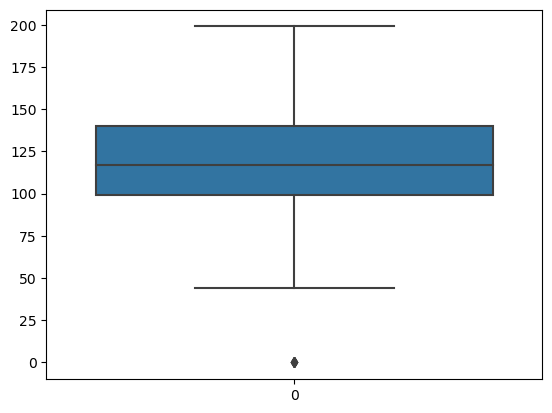

In [8]:
plt.figure()
sns.boxplot(df['Glucose'])


In [9]:
df=df[df['Glucose']>25]

<Axes: >

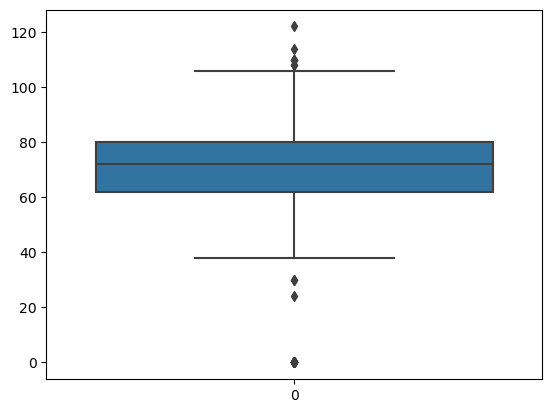

In [10]:
plt.figure()
sns.boxplot(df['BloodPressure'])

In [11]:
df=df[df['BloodPressure']>20]

<Axes: >

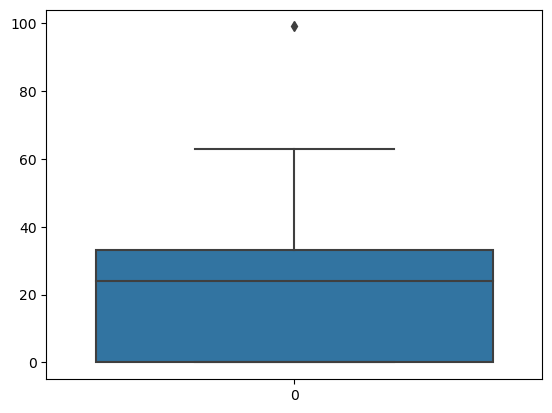

In [12]:
plt.figure()
sns.boxplot(df['SkinThickness'])

In [13]:
df=df[df['SkinThickness']<80]

<Axes: >

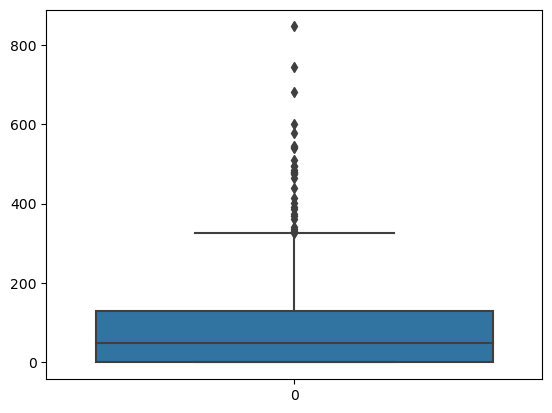

In [14]:
plt.figure()
sns.boxplot(df['Insulin'])

In [15]:
df=df[df['Insulin']<600]

<Axes: >

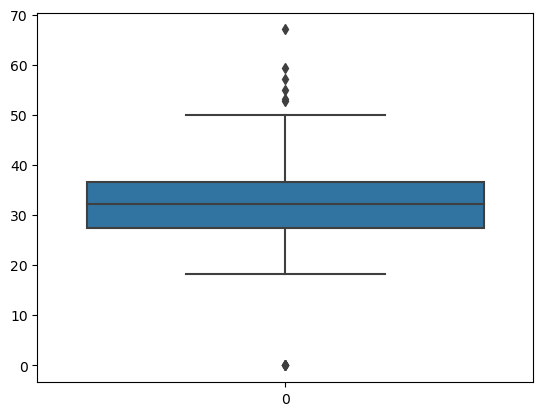

In [16]:
plt.figure()
sns.boxplot(df['BMI'])

In [17]:
df=df[df['BMI']>10]

In [18]:
df.shape

(719, 9)

<Axes: xlabel='Outcome', ylabel='count'>

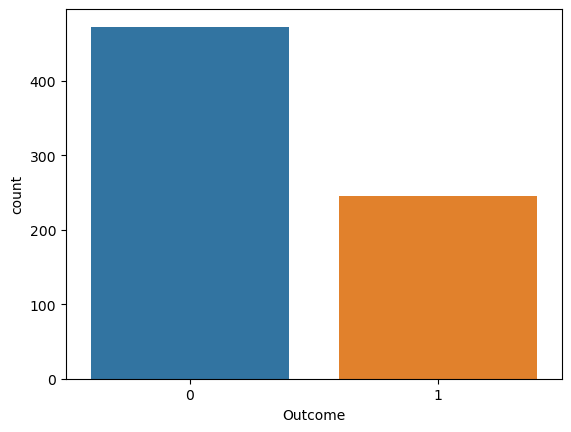

In [19]:
plt.figure()
sns.countplot(x=df['Outcome'])

<Axes: >

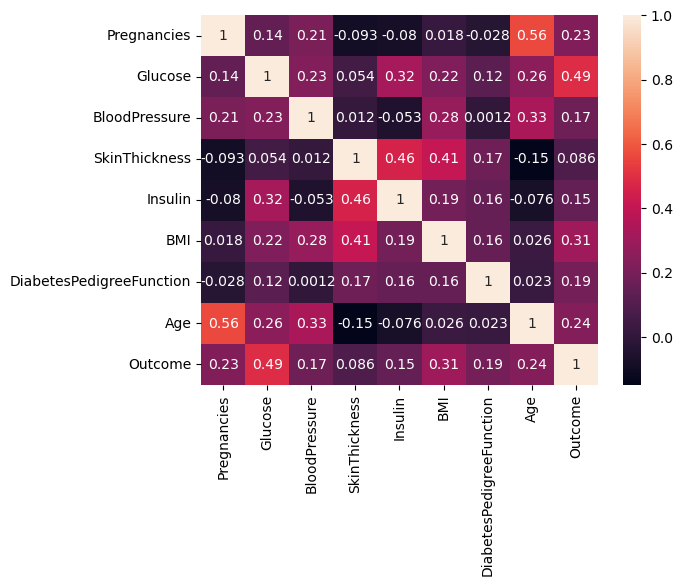

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
X=df.drop(columns=['Outcome'])
Y=df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_predict=lr.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

<Axes: >

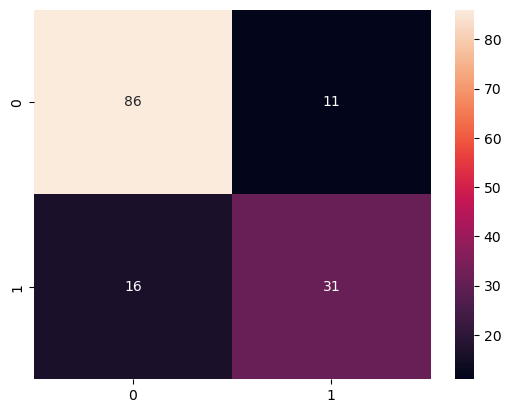

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy =accuracy_score(y_test, y_predict)
accuracy

0.8125

In [29]:
import pickle
filename='diabetes_model.sav'
pickle.dump(lr,open(filename,'wb'))